# Analisis Exploratorio del dataset

Importación de librerias

In [3]:
#importa pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lectura de datos

In [4]:
df= pd.read_csv ('https://raw.githubusercontent.com/BrennGonzalez/Notebooks/refs/heads/main/glaciar_ing.csv')

Inspección de datos

In [5]:
print("Primeras 5 filas del dataframe")
df.head()


Primeras 5 filas del dataframe


,Provincia,Cuenca,Subcuenca,Codigo_cue,ID_local,Tipo_geofo,Nombre_com,Clas_prima,Forma,Frente,...,H_min_tota,Pendiente,Orientacio,H_max_parc,H_media_pa,H_min_parc,Img_ba_F,Img_ba_S,Img_ap_F,Img_ap_S
0,Catamarca,Varias de la Puna,Antofagasta de las Sierras,K0830000,G670333O263768S,ND,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-13,SENTINEL-2,NaN,NaN
1,Catamarca,Varias de la Puna,Antofagasta de las Sierras,K0830000,G670552O265877S,ND,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-13,SENTINEL-2,NaN,NaN
2,La Rioja,R. Vinchina-Bermejo,R. Vinchina-Bermejo,F0520000,G687787O277928S,ND,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-18,SENTINEL-2,NaN,NaN
3,La Rioja,R. Vinchina-Bermejo,R. Vinchina-Bermejo,F0520000,G687996O277880S,ND,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-18,SENTINEL-2,NaN,NaN
4,La Rioja,R. Vinchina-Bermejo,R. Vinchina-Bermejo,F0520000,G687819O278222S,ND,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-18,SENTINEL-2,NaN,NaN


In [6]:
print(f"El dataframe cuenta con {df.shape[0]} filas y {df.shape[1]} columnas")

El dataframe cuenta con 3380 filas y 37 columnas


In [7]:
print("Información del dataframe")

df.info()

#Podriamos eliminar las columnas:
#Nombre_com
#Forma
#frente
#Perf_long
#Fuente_ali
#Act_lengua
#Morena_1
#Morena_2
#Cob_lengua

Información del dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3380 entries, 0 to 3379
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3380 non-null   object 
 1   Cuenca      3380 non-null   object 
 2   Subcuenca   3380 non-null   object 
 3   Codigo_cue  3380 non-null   object 
 4   ID_local    3380 non-null   object 
 5   Tipo_geofo  3380 non-null   object 
 6   Nombre_com  32 non-null     object 
 7   Clas_prima  3380 non-null   int64  
 8   Forma       154 non-null    float64
 9   Frente      152 non-null    float64
 10  Perf_long   147 non-null    float64
 11  Fuente_ali  175 non-null    float64
 12  Act_lengua  147 non-null    float64
 13  Morena_1    139 non-null    float64
 14  Morena_2    126 non-null    float64
 15  Cob_lengua  154 non-null    float64
 16  Origen_GE   1931 non-null   float64
 17  Act_GE      1931 non-null   float64
 18  Forma_GE    1931 non-null   float64
 19  E

In [8]:
#Columnas con todos los valores Nan
Columnas_Nan=df.columns[df.isnull().all()]

Columnas_Nan

Index(['Img_ap_F'], dtype='object')

Renombrar columnas con nombres incomodos

## Limpieza

Durante el proceso de limpieza y preparación de datos, se realizó la eliminación de varias columnas del dataset original, con el objetivo de optimizar la estructura de los datos para el análisis exploratorio y modelado posterior. Las variables eliminadas fueron:

Nombre_com, Forma, frente, Perf_long, Fuente_ali, Act_lengua, Morena_1, Morena_2 y Cob_lengua.

La decisión se fundamenta en los criterios:

* Irrelevancia respecto al objetivo del análisis:
el enfoque del trabajo no requiere información morfológica detallada ni descripciones específicas de las características físicas del glaciar.

*  Bajo aporte informativo:
 la escasa cantidad de datos disponibles en los features eliminados los vuelve datos poco relevantes, por lo cual se consideran prescindibles.



In [9]:
#Columnas con algunos valores Nan
Columnas_Any=df.columns[df.isnull().any()]

Columnas_Any


Index(['Nombre_com', 'Forma', 'Frente', 'Perf_long', 'Fuente_ali',
       'Act_lengua', 'Morena_1', 'Morena_2', 'Cob_lengua', 'Origen_GE',
       'Act_GE', 'Forma_GE', 'Estruct_I', 'Estruct_II', 'Longitud', 'Latitud',
       'Area', 'Largo_tota', 'H_max_tota', 'H_media_to', 'H_min_tota',
       'Pendiente', 'Orientacio', 'H_max_parc', 'H_media_pa', 'H_min_parc',
       'Img_ap_F', 'Img_ap_S'],
      dtype='object')

In [10]:
#Filas con todos Nan
Filas_Nan=df[df.isnull().all(axis=1)]

Filas_Nan

,Provincia,Cuenca,Subcuenca,Codigo_cue,ID_local,Tipo_geofo,Nombre_com,Clas_prima,Forma,Frente,...,H_min_tota,Pendiente,Orientacio,H_max_parc,H_media_pa,H_min_parc,Img_ba_F,Img_ba_S,Img_ap_F,Img_ap_S


In [11]:
#Filas algún Nan
Filas_Any=df[df.isnull().any(axis=1)]

Filas_Any

,Provincia,Cuenca,Subcuenca,Codigo_cue,ID_local,Tipo_geofo,Nombre_com,Clas_prima,Forma,Frente,...,H_min_tota,Pendiente,Orientacio,H_max_parc,H_media_pa,H_min_parc,Img_ba_F,Img_ba_S,Img_ap_F,Img_ap_S
0,Catamarca,Varias de la Puna,Antofagasta de las Sierras,K0830000,G670333O263768S,ND,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-13,SENTINEL-2,NaN,NaN
1,Catamarca,Varias de la Puna,Antofagasta de las Sierras,K0830000,G670552O265877S,ND,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-13,SENTINEL-2,NaN,NaN
2,La Rioja,R. Vinchina-Bermejo,R. Vinchina-Bermejo,F0520000,G687787O277928S,ND,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-18,SENTINEL-2,NaN,NaN
3,La Rioja,R. Vinchina-Bermejo,R. Vinchina-Bermejo,F0520000,G687996O277880S,ND,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-18,SENTINEL-2,NaN,NaN
4,La Rioja,R. Vinchina-Bermejo,R. Vinchina-Bermejo,F0520000,G687819O278222S,ND,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-18,SENTINEL-2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,San Juan,R. Jáchal,R. Blanco Inferior,J0530000,G694052O296515S,GC,NaN,6,3.0,0.0,...,4953.0,19.748,SE,5089.0,5000.0,4953.0,2020-03-19,SENTINEL-2,NaN,Bing/Google Earth
3376,San Juan,R. Jáchal,R. Blanco Inferior,J0530000,G697667O300847S,GC,NaN,6,3.0,0.0,...,4686.0,23.951,S,4836.0,4748.0,4686.0,2020-03-19,SENTINEL-2,NaN,Bing/Google Earth
3377,San Juan,R. Jáchal,R. Blanco Inferior,J0530000,G694568O296062S,MN,NaN,7,NaN,NaN,...,5901.0,9.868,S,5931.0,5915.0,5901.0,2020-03-19,SENTINEL-2,NaN,NaN
3378,San Juan,R. Jáchal,R. Blanco Inferior,J0530000,G696616O300497S,MN,NaN,6,3.0,0.0,...,4640.0,19.097,S,5113.0,5113.0,5112.0,2020-03-19,SENTINEL-2,NaN,NaN


Nuevo df con columnas eliminadas

In [12]:
#Nuevo df con columnas eliminadas

df2=df.drop(columns=['Forma','Frente','Perf_long','Fuente_ali','Act_lengua','Morena_1','Morena_2','Cob_lengua' ])
df2

#Forma
#frente
#Perf_long
#Fuente_ali
#Act_lengua
#Morena_1
#Morena_2
#Cob_lengua

,Provincia,Cuenca,Subcuenca,Codigo_cue,ID_local,Tipo_geofo,Nombre_com,Clas_prima,Origen_GE,Act_GE,...,H_min_tota,Pendiente,Orientacio,H_max_parc,H_media_pa,H_min_parc,Img_ba_F,Img_ba_S,Img_ap_F,Img_ap_S
0,Catamarca,Varias de la Puna,Antofagasta de las Sierras,K0830000,G670333O263768S,ND,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-13,SENTINEL-2,NaN,NaN
1,Catamarca,Varias de la Puna,Antofagasta de las Sierras,K0830000,G670552O265877S,ND,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-13,SENTINEL-2,NaN,NaN
2,La Rioja,R. Vinchina-Bermejo,R. Vinchina-Bermejo,F0520000,G687787O277928S,ND,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-18,SENTINEL-2,NaN,NaN
3,La Rioja,R. Vinchina-Bermejo,R. Vinchina-Bermejo,F0520000,G687996O277880S,ND,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-18,SENTINEL-2,NaN,NaN
4,La Rioja,R. Vinchina-Bermejo,R. Vinchina-Bermejo,F0520000,G687819O278222S,ND,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-18,SENTINEL-2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,San Juan,R. Jáchal,R. Blanco Inferior,J0530000,G694052O296515S,GC,NaN,6,NaN,NaN,...,4953.0,19.748,SE,5089.0,5000.0,4953.0,2020-03-19,SENTINEL-2,NaN,Bing/Google Earth
3376,San Juan,R. Jáchal,R. Blanco Inferior,J0530000,G697667O300847S,GC,NaN,6,NaN,NaN,...,4686.0,23.951,S,4836.0,4748.0,4686.0,2020-03-19,SENTINEL-2,NaN,Bing/Google Earth
3377,San Juan,R. Jáchal,R. Blanco Inferior,J0530000,G694568O296062S,MN,NaN,7,NaN,NaN,...,5901.0,9.868,S,5931.0,5915.0,5901.0,2020-03-19,SENTINEL-2,NaN,NaN
3378,San Juan,R. Jáchal,R. Blanco Inferior,J0530000,G696616O300497S,MN,NaN,6,NaN,NaN,...,4640.0,19.097,S,5113.0,5113.0,5112.0,2020-03-19,SENTINEL-2,NaN,NaN


Ver como reemplazar Nan y outlier

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3380 entries, 0 to 3379
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3380 non-null   object 
 1   Cuenca      3380 non-null   object 
 2   Subcuenca   3380 non-null   object 
 3   Codigo_cue  3380 non-null   object 
 4   ID_local    3380 non-null   object 
 5   Tipo_geofo  3380 non-null   object 
 6   Nombre_com  32 non-null     object 
 7   Clas_prima  3380 non-null   int64  
 8   Origen_GE   1931 non-null   float64
 9   Act_GE      1931 non-null   float64
 10  Forma_GE    1931 non-null   float64
 11  Estruct_I   1931 non-null   float64
 12  Estruct_II  1931 non-null   float64
 13  Longitud    3289 non-null   float64
 14  Latitud     3289 non-null   float64
 15  Area        3289 non-null   float64
 16  Largo_tota  2576 non-null   float64
 17  H_max_tota  3289 non-null   float64
 18  H_media_to  3289 non-null   float64
 19  H_min_tota  3289 non-null  

In [18]:
df2.describe()

,Clas_prima,Origen_GE,Act_GE,Forma_GE,Estruct_I,Estruct_II,Longitud,Latitud,Area,Largo_tota,H_max_tota,H_media_to,H_min_tota,Pendiente,H_max_parc,H_media_pa,H_min_parc,Img_ap_F
count,3380.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,3289.000000,3289.000000,3289.000000,2576.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,0.0
mean,8.086095,1.050751,1.655101,2.206111,1.450544,1.790782,-67.808393,-26.945786,0.075887,423.319488,5097.356035,5042.888416,4990.863484,20.502710,5088.786257,5043.009121,4998.803284,NaN
std,1.096140,0.260556,0.475458,1.483583,0.515072,0.406856,1.699664,2.389720,0.318390,503.479731,562.356763,554.087664,554.241019,6.735199,561.078397,556.062491,555.185757,NaN
min,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-70.018800,-30.604200,0.010000,18.000000,3517.000000,3453.000000,3362.000000,1.515000,3517.000000,3453.000000,3362.000000,NaN
25%,7.000000,1.000000,1.000000,1.000000,1.000000,2.000000,-69.492600,-29.014800,0.015000,160.000000,4673.000000,4623.000000,4583.000000,16.049000,4667.000000,4625.000000,4587.000000,NaN
50%,9.000000,1.000000,2.000000,2.000000,1.000000,2.000000,-68.541000,-27.269200,0.027200,271.000000,4969.000000,4911.000000,4856.000000,20.665000,4959.000000,4911.000000,4865.000000,NaN
75%,9.000000,1.000000,2.000000,4.000000,2.000000,2.000000,-66.139700,-24.814700,0.057200,470.000000,5472.000000,5416.000000,5375.000000,25.397000,5464.000000,5416.000000,5375.000000,NaN
max,9.000000,3.000000,2.000000,9.000000,4.000000,2.000000,-65.007000,-22.134100,9.193700,6490.000000,6740.000000,6663.000000,6660.000000,42.837000,6740.000000,6680.000000,6660.000000,NaN


In [24]:
q1 = df2['Area'].quantile(0.25)
#area_debajoq1=[(df2['Area'] < q1)]

In [25]:
q3 = df2['Area'].quantile(0.75)
#area_sobreq3=[(df2['Area'] > q3)]

In [22]:
area_entreq1q3=[(df2['Area'] >= q1) & (df2['Area'] <= q3)]

In [26]:
df2['Area'] = pd.cut(df2['Area'], bins=[df2['Area'].min(), q1, q3, df2['Area'].max()], labels=['A_pequeño', 'A_media', 'A_grande'], include_lowest=True,duplicates='drop')

In [30]:
df2['Area']

,Area
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3375,A_grande
3376,A_grande
3377,A_media
3378,A_media


Análisis de outliers según variables

In [40]:
# Suponiendo que df2 es tu DataFrame original
outliers_info = {}

# Loop por cada columna numérica
for col in df2.select_dtypes(include='number').columns:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar índices de filas con outliers
    outlier_rows = df2[(df2[col] < limite_inferior) | (df2[col] > limite_superior)].index.tolist()

    # Si hay outliers, guardamos la info
    if outlier_rows:
        outliers_info[col] = outlier_rows

# Mostrar resultados
for col, filas in outliers_info.items():
    print(f"🔸 La columna '{col}' tiene {len(filas)} outliers en las filas: {filas}")

🔸 La columna 'Clas_prima' tiene 5 outliers en las filas: [1210, 1741, 2939, 2940, 3151]
🔸 La columna 'Origen_GE' tiene 97 outliers en las filas: [103, 148, 717, 719, 853, 963, 964, 966, 1004, 1009, 1073, 1074, 1091, 1143, 1238, 1245, 1249, 1294, 1309, 1328, 1388, 1450, 1504, 1535, 1551, 1561, 1562, 1582, 1608, 1619, 1620, 1621, 1988, 1993, 2052, 2168, 2198, 2239, 2243, 2244, 2263, 2266, 2292, 2293, 2304, 2308, 2309, 2333, 2343, 2390, 2402, 2416, 2422, 2426, 2430, 2518, 2522, 2524, 2525, 2526, 2528, 2538, 2548, 2557, 2562, 2563, 2564, 2569, 2577, 2596, 2618, 2620, 2663, 2664, 2665, 2666, 2686, 2695, 2715, 2724, 2727, 2736, 2737, 2745, 2900, 2901, 2942, 3045, 3064, 3065, 3066, 3067, 3330, 3331, 3332, 3361, 3362]
🔸 La columna 'Forma_GE' tiene 1 outliers en las filas: [3332]
🔸 La columna 'Estruct_I' tiene 5 outliers en las filas: [209, 1501, 1523, 1545, 1607]
🔸 La columna 'Estruct_II' tiene 404 outliers en las filas: [93, 105, 106, 108, 109, 110, 116, 128, 134, 135, 137, 138, 139, 145, 146

## Gráficos

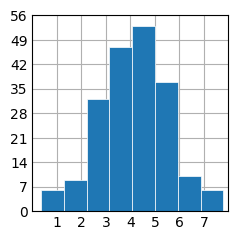

In [31]:
plt.style.use('_mpl-gallery')

# plot:
fig, ax = plt.subplots()

ax.hist(Provincia, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.show()

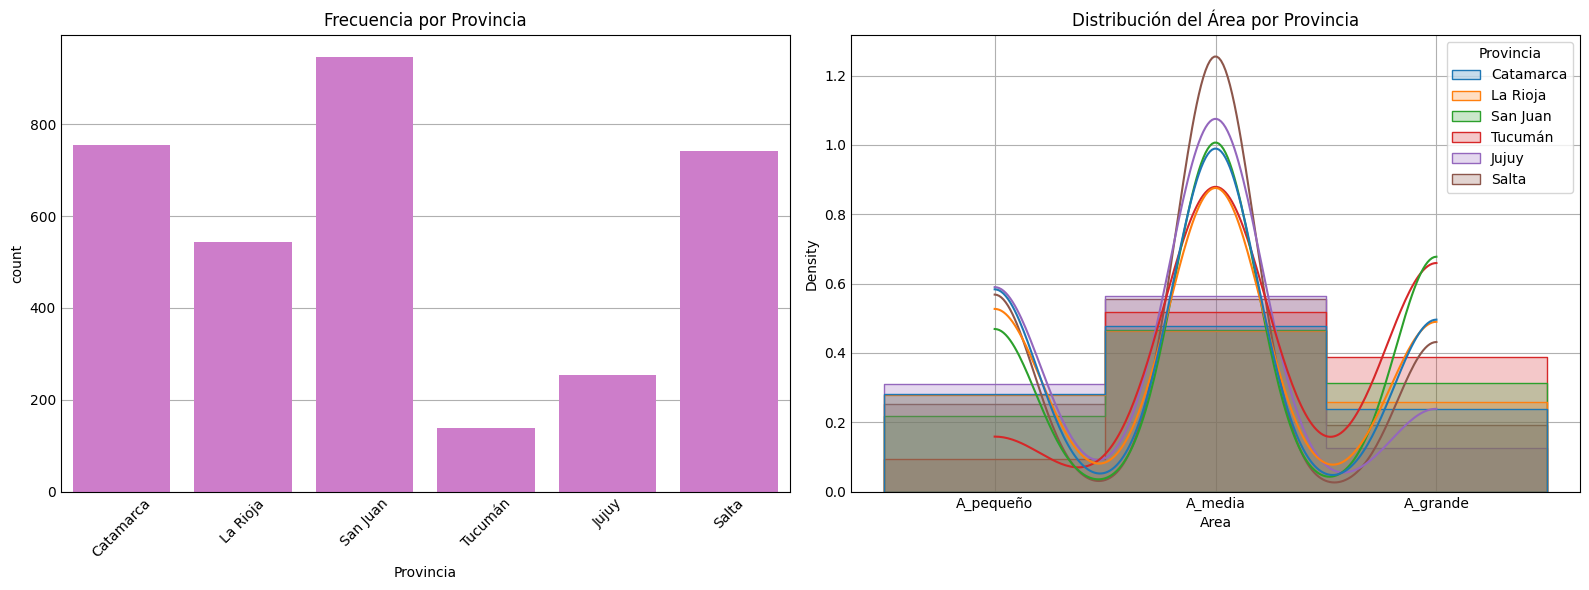

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico para la variable categórica 'Provincia'
sns.countplot(data=df2, x='Provincia', color='orchid', ax=axes[0])
axes[0].set_title('Frecuencia por Provincia')
axes[0].tick_params(axis='x', rotation=45)

# Histograma del área por provincia (superpuesto)
sns.histplot(data=df2, x='Area', hue='Provincia', kde=True, ax=axes[1], palette='tab10', element='step', stat='density', common_norm=False)
axes[1].set_title('Distribución del Área por Provincia')

plt.tight_layout()
plt.show()


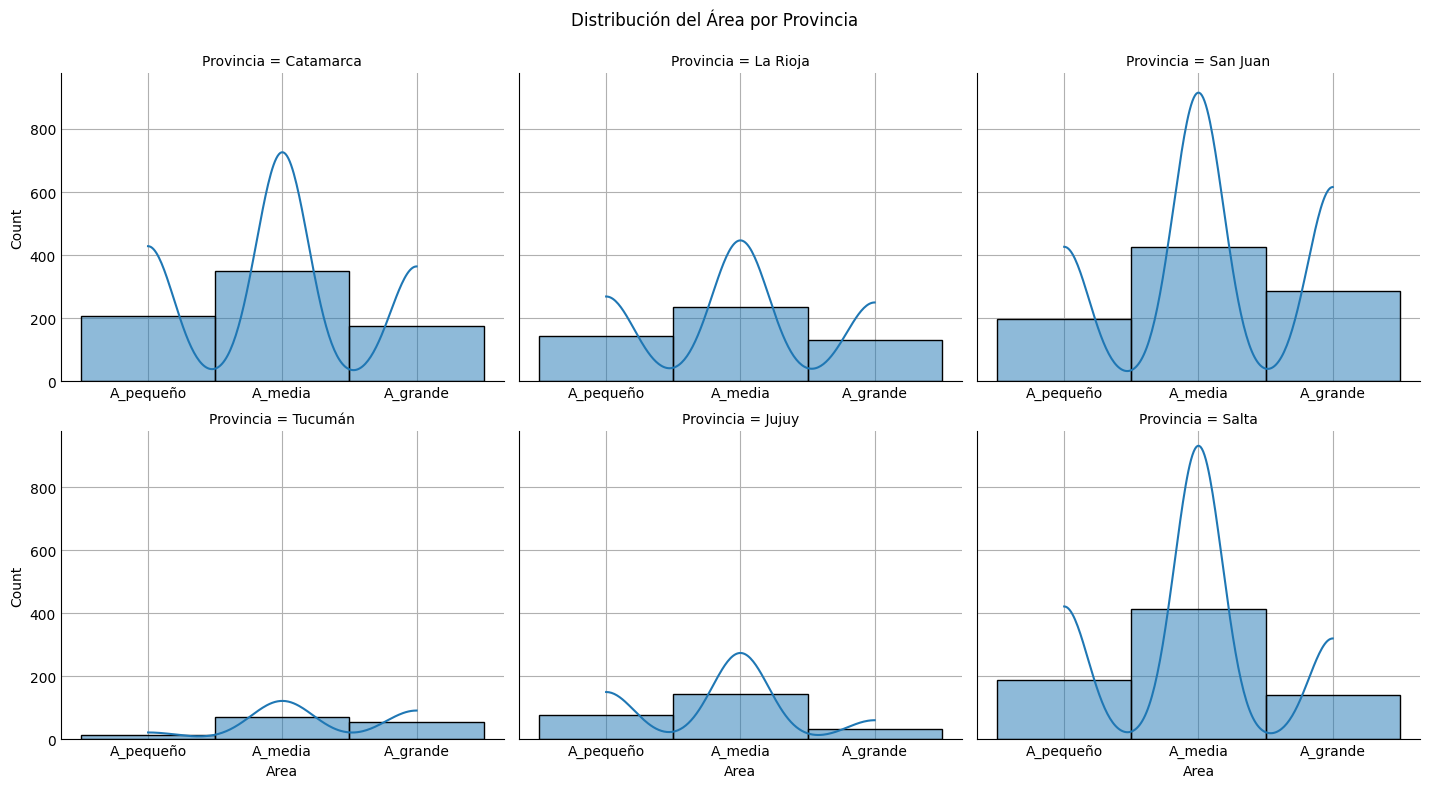

In [46]:
sns.displot(data=df2, x='Area', col='Provincia', kde=True, col_wrap=3, height=4, aspect=1.2, facet_kws={'sharex': False})
plt.subplots_adjust(top=0.9)
plt.suptitle('Distribución del Área por Provincia')
plt.show()


<ipython-input-37-2e2f26445ea6>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Pendiente')


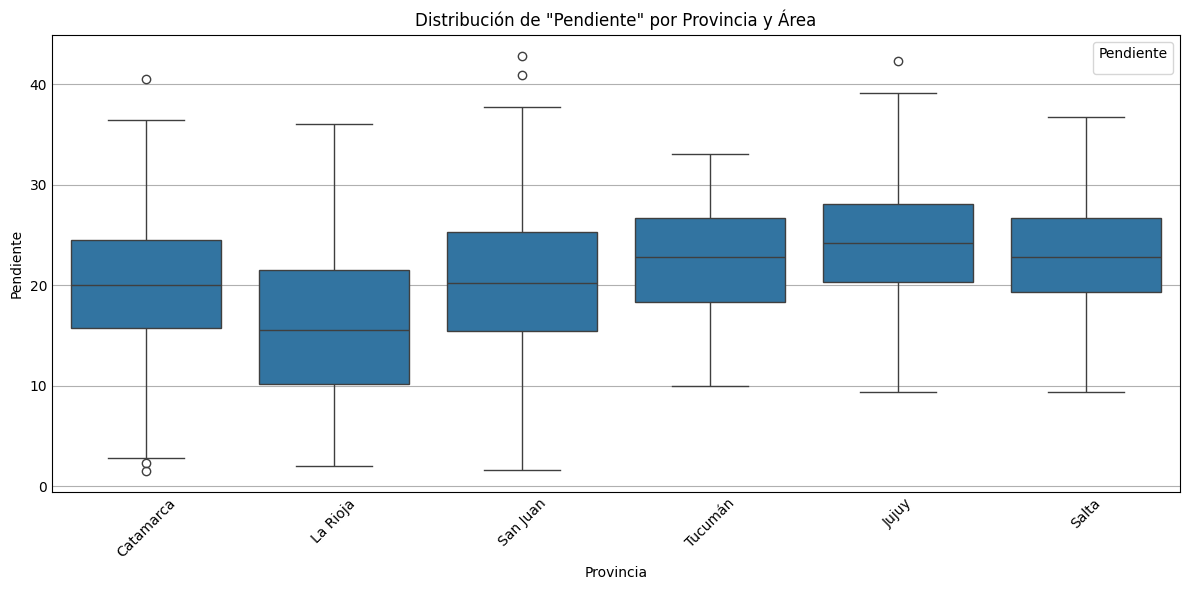

In [37]:
# Gráfico de caja (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2, x='Provincia', y='Pendiente')

plt.title('Distribución de "Pendiente" por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Pendiente')
plt.xticks(rotation=45)
plt.legend(title='Pendiente')
plt.tight_layout()

Ahora analizamos los outliers que hay en la variable Largo_tota con un gráfico de bigotes

<ipython-input-38-70df6fe3b8b0>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Largo total')


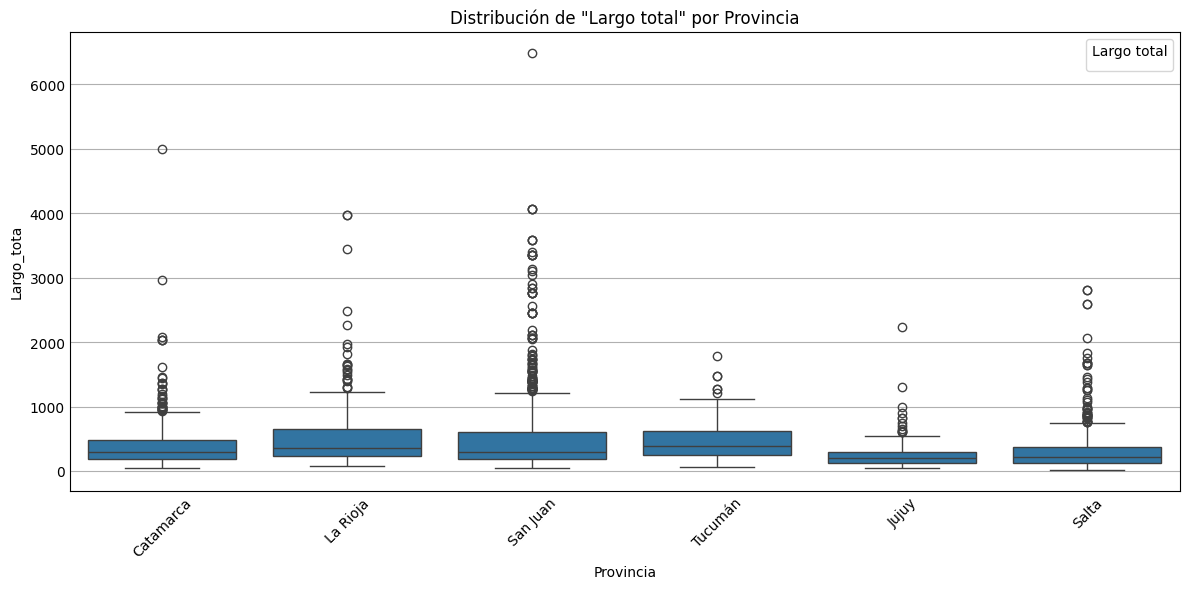

In [38]:
# Gráfico de caja (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2, x='Provincia', y='Largo_tota')

plt.title('Distribución de "Largo total" por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Largo_tota')
plt.xticks(rotation=45)
plt.legend(title='Largo total')
plt.tight_layout()

Como los outliers son muy numerosos para esta variable lo que vamos a hacer es analizarla ¿Por qué son tan numerosos?¿Vale la pena eliminar los outliers en este caso? Para analizarlo vamos a hacer un análisis exploratorio exhaustivo de por ejemplo, la provincia de San Juan, teniendo en cuenta que es la que presenta mayor cantidad de outliers.


In [ ]:
# Gráfico de caja (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2_filtrado, x='Provincia', y='Area', hue='Area_cat')

plt.title('Distribución de "valor" por Provincia y Área')
plt.xlabel('Provincia')
plt.ylabel('Area')
plt.xticks(rotation=45)
plt.legend(title='Area')
plt.tight_layout()

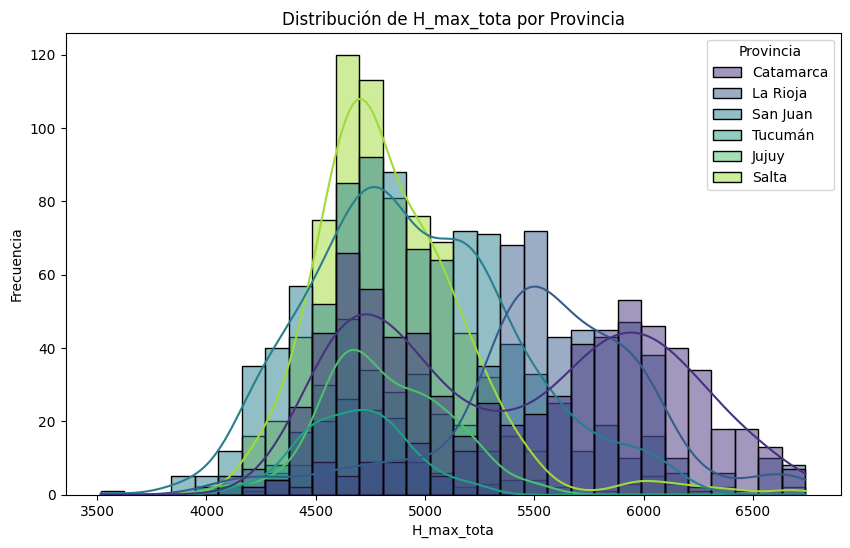

In [15]:
vars_to_plot = [ 'H_max_tota']

for var in vars_to_plot:

    plt.figure(figsize=(10, 6))

    sns.histplot(data=df2, x=var, hue='Provincia', kde=True, common_norm=False, palette="viridis")

    plt.title(f'Distribución de {var} por Provincia')

    plt.xlabel(var)

    plt.ylabel('Frecuencia')



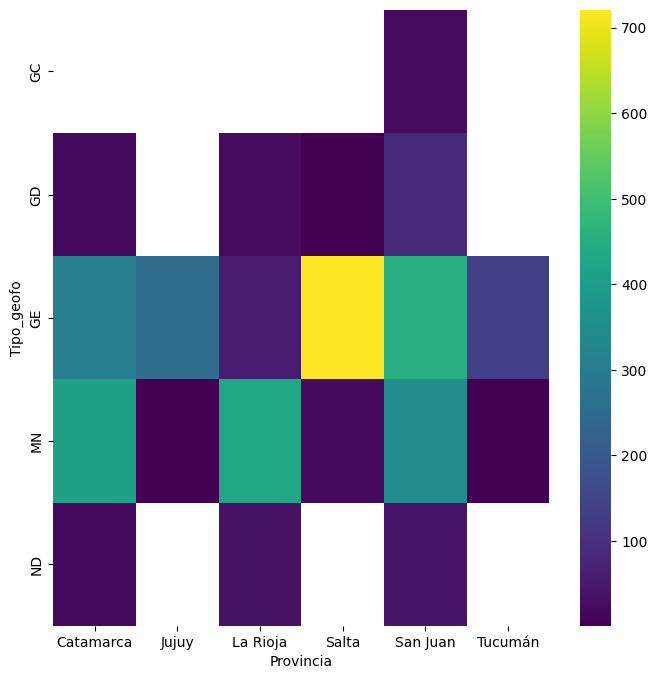

In [16]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Tipo_geofo'].value_counts()
    for x_label, grp in df.groupby('Provincia')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Provincia')
_ = plt.ylabel('Tipo_geofo')

In [17]:
from sklearn.preprocessing import MinMaxScaler